In [1]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture4')      
except Exception:
  pass

Cloning into 'DLCV_CLASS'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 236 (delta 43), reused 102 (delta 36), pack-reused 127
Receiving objects: 100% (236/236), 33.07 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (71/71), done.


## Edge Detection & Image Gradients

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('data/Lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [0]:
# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

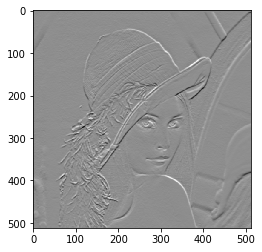

In [4]:
plt.imshow(sobel_x, cmap='gray')

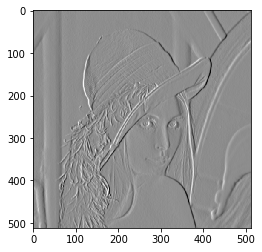

In [5]:
plt.imshow(sobel_y, cmap='gray')

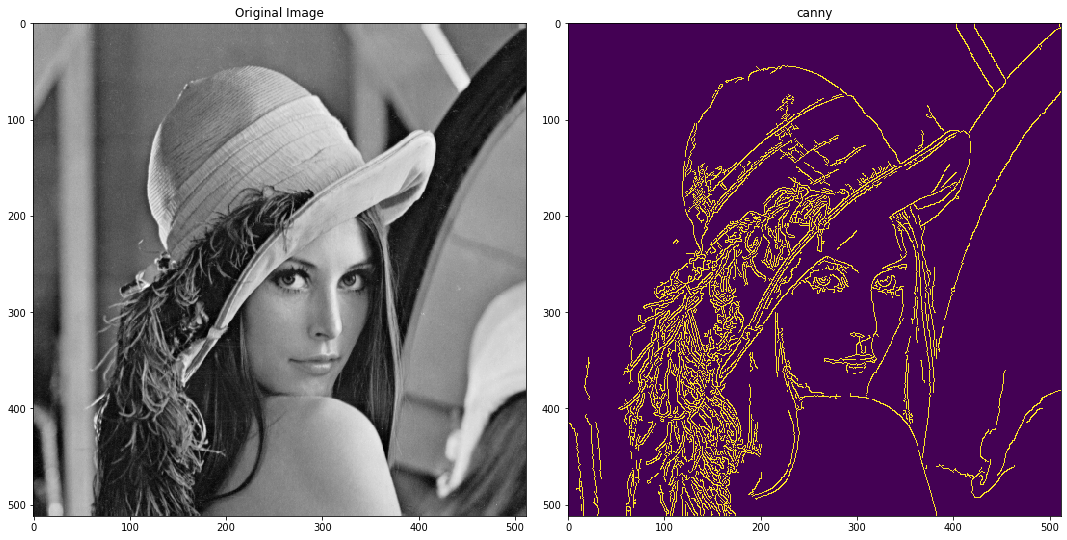

In [6]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
#cv2.imwrite('original_image.png', image)

# Then, we need to provide two values: threshold1 and threshold2. Any gradient 
# value larger than threshold2 is considered to be an edge. Any value below 
# threshold1 is considered not to be an edge. Values in between threshold1 and 
# threshold2 are either classiﬁed as edges or non-edges based on how their 
# intensities are “connected”. In this case, any gradient values below 60 are 
# considered non-edges whereas any values above 120 are considered edges.

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 200)
axs[1].imshow(canny)
axs[1].set_title('canny')
#cv2.imwrite('canny.png', canny)

plt.show()

## Coner detection

#### Harris Corner Detection is an algorithm developed in 1998 for corner detection  (http://www.bmva.org/bmvc/1988/avc-88-023.pdf) and works fairly well.

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)

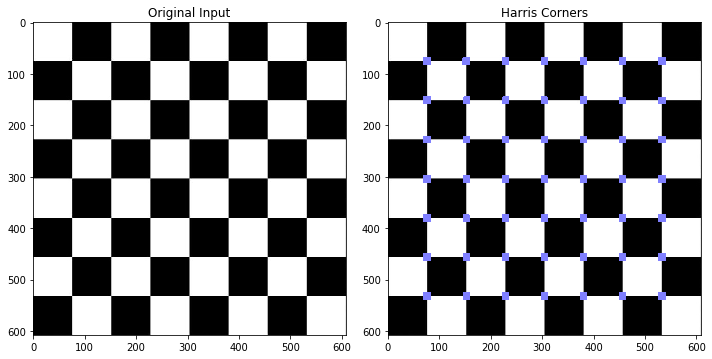

In [11]:
image = cv2.imread('data/chess.JPG')
temp_output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()
 
axs[0].imshow(image)
axs[0].set_title('Original Input')
cv2.imwrite('input.jpg', image)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
temp_output[harris_corners > 0.025] = [255, 127, 127]

axs[1].imshow(cv2.cvtColor(temp_output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Harris Corners')
cv2.imwrite('harris_corners.jpg', temp_output)

plt.show()

## Improved Corner Detection using - Good Features to Track

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.


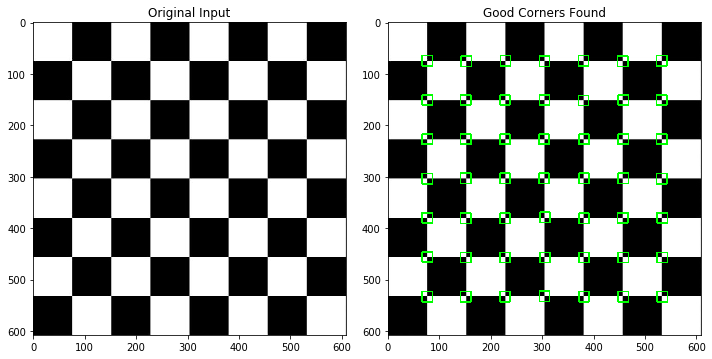

In [12]:
image = cv2.imread('data/chess.JPG')
temp_output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Input')
cv2.imwrite('input.jpg', image)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 49, 0.01, 15)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(temp_output,(x-10,y-10),(x+10,y+10),(0,255,0), 2)

axs[1].imshow(cv2.cvtColor(temp_output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Good Corners Found')
cv2.imwrite('good_corners_found.jpg', temp_output)

plt.show()